<a href="https://colab.research.google.com/github/pwetherby/CancerAnalysis/blob/main/CancerRateAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cancer Rate Analysis Project


## Imports

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics, model_selection

### Import CSV files

In [2]:
url0 = 'https://raw.githubusercontent.com/pwetherby/CancerAnalysis/main/income_death_data.csv'
income_death = pd.read_csv(url0)
url1 = 'https://raw.githubusercontent.com/pwetherby/CancerAnalysis/main/income_incident_data.csv'
income_incident = pd.read_csv(url1)
url2 = 'https://raw.githubusercontent.com/pwetherby/CancerAnalysis/main/incident_death_data.csv'
incident_death = pd.read_csv(url2)

### Import dataset

In [3]:
high_risk = income_death.sort_values('Age-Adjusted Death Rate',ascending=False).head()

In [4]:
high_risk = high_risk.drop('Median_Income',axis=1)
high_risk = high_risk.drop('Average Deaths per Year',axis=1)

## Graphs

### High Risk Counties for Cancer Deaths

In [5]:
high_risk

,County,Age-Adjusted Death Rate
910,"North Slope Borough, Alaska",124.9
1010,"Polk County, Tennessee",103.3
418,"Floyd County, Kentucky",98.7
832,"Mississippi County, Missouri",97.2
908,"Nome Census Area, Alaska",96.1


### Cancer Death and Incident Data


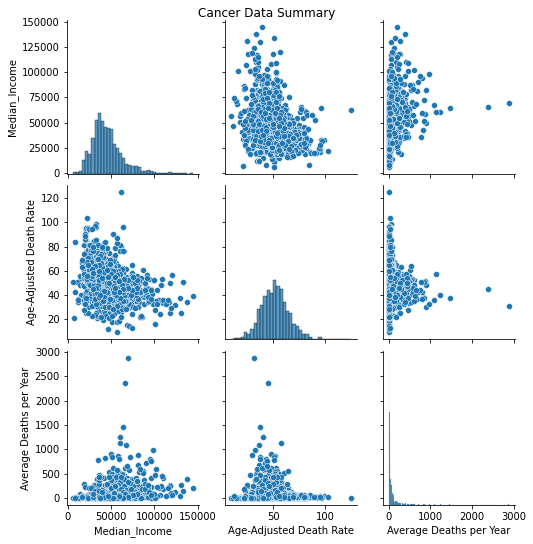

In [6]:
g = sns.pairplot(income_death);
g.fig.suptitle("Cancer Data Summary", y=1.00);

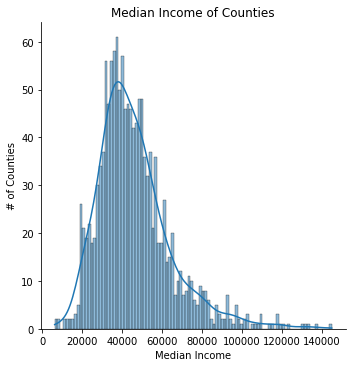

In [7]:
sns.displot(x='Median_Income',data=income_death,kde=True,bins=100);
plt.title('Median Income of Counties');
plt.ylabel('# of Counties');
plt.xlabel('Median Income');

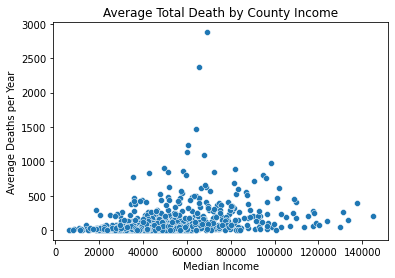

In [8]:

sns.scatterplot(x='Median_Income',y='Average Deaths per Year',data=income_death);
plt.title('Average Total Death by County Income');
plt.xlabel('Median Income');

Text(0.5, 0, 'Median Income')

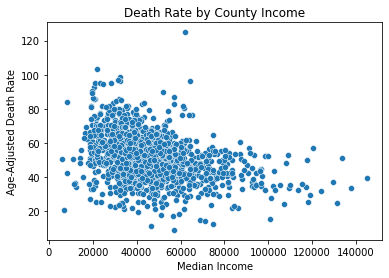

In [9]:
sns.scatterplot(x='Median_Income',y='Age-Adjusted Death Rate',data=income_death);
plt.title('Death Rate by County Income')
plt.xlabel('Median Income')

### Income Death Correlation

In [10]:
income_death.corr()

,Median_Income,Age-Adjusted Death Rate,Average Deaths per Year
Median_Income,1.000000,-0.354285,0.338089
Age-Adjusted Death Rate,-0.354285,1.000000,-0.145618
Average Deaths per Year,0.338089,-0.145618,1.000000


In [11]:
# income_incident.head()

In [12]:
income_incident = income_incident.drop('County',axis=1)

In [13]:
incident_death.corr()                                                                                                                             

,Median_Income_x,Age-Adjusted Incidence Rate,Average Annual Count,Age-Adjusted Death Rate,Average Deaths per Year
Median_Income_x,1.000000,-0.309317,0.352895,-0.360187,0.342245
Age-Adjusted Incidence Rate,-0.309317,1.000000,-0.110913,0.891397,-0.111130
Average Annual Count,0.352895,-0.110913,1.000000,-0.164815,0.997886
Age-Adjusted Death Rate,-0.360187,0.891397,-0.164815,1.000000,-0.155333
Average Deaths per Year,0.342245,-0.111130,0.997886,-0.155333,1.000000


## COUNTY DATA

## Input County name as 'County, State' ex: King County, Washington

INPUT IS CASE SENSITIVE


In [14]:
while True:             # Loop continuously
    county = input('County Name: ')   # Get the input
    if (incident_death['County'] == county).any():      # If it is in the column..
        break
    else:
      print('County Not Found, please enter in a valid County')

County Name: Pierce County, Washington


In [15]:
input = incident_death.loc[incident_death['County'] == county ]

### County Data Summary:

In [16]:
input

,County,Median_Income_x,Age-Adjusted Incidence Rate,Average Annual Count,Age-Adjusted Death Rate,Average Deaths per Year
890,"Pierce County, Washington",65475.6,76.1,590,51.6,396


In [17]:
incident_death = incident_death.drop('County',axis=1)

## Machine Learning Section

Define x and y

In [18]:
# Independent Variable x and Dependent Variable y

In [19]:
x=incident_death.drop(['Age-Adjusted Death Rate'],axis=1).values

In [20]:
y=incident_death['Age-Adjusted Death Rate'].values

In [21]:
#print(x)

In [22]:
#print(y)

Split the dataset in training set and test set

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=0)

Train the model on the training set

In [24]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

Predict the test set results

In [25]:
y_pred=ml.predict(x_test)
#print(y_pred)

Predict Using Values from incident_death

In [26]:
input = input.drop(['County'],axis=1)

Chosen County Data

In [27]:
# input

In [28]:
val = input.drop(['Age-Adjusted Death Rate'],axis=1).values

In [29]:
# val

Predicted Death Rate

In [30]:
# ml.predict(val)

In [31]:
prediction = np.array2string(ml.predict(val)[0])

Evaluate the model

In [32]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

Prediction Results:

Text(0.5, 1.0, 'Actual vs, Predicted')

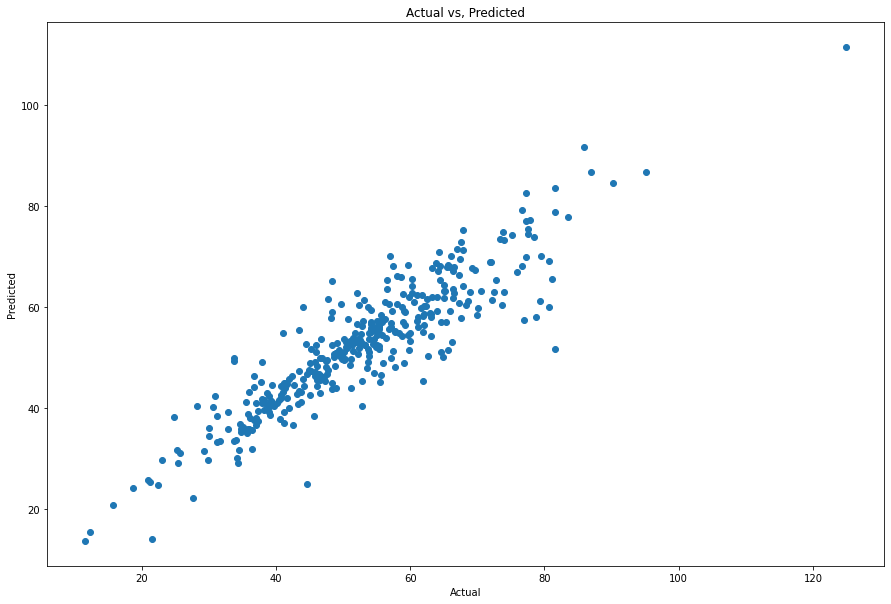

In [33]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs, Predicted')

In [34]:
pred_y_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference': y_test-y_pred})
pred_y_df[0:5]

,Actual Value,Predicted Value,Difference
0,64.5,68.192277,-3.692277
1,51.5,53.934093,-2.434093
2,63.1,58.560505,4.539495
3,39.0,42.388783,-3.388783
4,50.3,49.757461,0.542539


## Program Results:

In [35]:
print('Chosen County: ' + county)

Chosen County: Pierce County, Washington


In [36]:
print('Predicted Death Rate of ' + county + ': ' + prediction)

Predicted Death Rate of Pierce County, Washington: 49.61241822


In [37]:
print('Prediction Accuracy: ' + str(score))

Prediction Accuracy: 0.8245352983243797
